In [1]:
import torch
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mindf\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
#Load csv
SLEEP_FITBIT_DATA = pd.read_csv(r'DATASETS\SLEEP\SLEEP_FITBIT_DATA.csv')

In [3]:
SLEEP_FITBIT_DATA.head

<bound method NDFrame.head of      HOURS_OF_SLEEP  REM_SLEEP  DEEP_SLEEP  HEART_RATE_BELOW_RESTING  SCORE  \
0              7.22       0.18        0.21                      0.98    0.0   
1              8.40       0.21        0.21                      0.73    0.0   
2              8.52       0.21        0.17                      0.26    0.0   
3              6.50       0.17        0.19                      0.99    0.0   
4              6.57       0.18        0.21                      0.97    0.0   
..              ...        ...         ...                       ...    ...   
174            8.45       0.22        0.19                      0.56    0.0   
175            7.53       0.24        0.19                      0.66    0.0   
176            6.13       0.22        0.22                      0.81    0.0   
177            7.44       0.18        0.21                      0.81    0.0   
178            6.48       0.12        0.13                      0.74    0.0   

     Unnamed: 5  Unna

In [10]:
#Create dictionary of ideal values for each score; calculate L2 norm to generate score)
IDEAL_VALS = {'HOURS_OF_SLEEP': 8, 'REM_SLEEP': 0.225, 'DEEP_SLEEP': 0.18, 'HEART_RATE_BELOW_RESTING': 0.58}
columns = SLEEP_FITBIT_DATA.columns.values.tolist()
columns = columns[:4]
#Generate scores for each lever - compare iteratively and generate average score on its basis
def generate_score(row):
    #Iterate over each column except for gender
    print(" =================================== ")
    total_score = 0
    for column in columns:
        if column == "SCORE": continue
        print(row[column], IDEAL_VALS[column])
        column_score = abs(row[column] - IDEAL_VALS[column])
        print(column_score)
        total_score += column_score
    #Average out the score
    row["SCORE"] = total_score / len(columns)
    print('END SCORE: ', row["SCORE"])
    return row

SLEEP_FITBIT_DATA = SLEEP_FITBIT_DATA.apply(generate_score, axis = "columns")

7.22 8
0.7800000000000002
0.18 0.225
0.04500000000000001
0.21 0.18
0.03
0.98 0.58
0.4
END SCORE:  0.3137500000000001
8.4 8
0.40000000000000036
0.21 0.225
0.015000000000000013
0.21 0.18
0.03
0.73 0.58
0.15000000000000002
END SCORE:  0.1487500000000001
8.52 8
0.5199999999999996
0.21 0.225
0.015000000000000013
0.17 0.18
0.009999999999999981
0.26 0.58
0.31999999999999995
END SCORE:  0.2162499999999999
6.5 8
1.5
0.17 0.225
0.05499999999999999
0.19 0.18
0.010000000000000009
0.99 0.58
0.41000000000000003
END SCORE:  0.49375
6.57 8
1.4299999999999997
0.18 0.225
0.04500000000000001
0.21 0.18
0.03
0.97 0.58
0.39
END SCORE:  0.4737499999999999
7.27 8
0.7300000000000004
0.17 0.225
0.05499999999999999
0.19 0.18
0.010000000000000009
0.77 0.58
0.19000000000000006
END SCORE:  0.2462500000000001
7.57 8
0.4299999999999997
0.22 0.225
0.0050000000000000044
0.14 0.18
0.03999999999999998
0.68 0.58
0.10000000000000009
END SCORE:  0.14374999999999993
7.27 8
0.7300000000000004
0.19 0.225
0.035
0.18 0.18
0.0
0.

In [11]:
print(SLEEP_FITBIT_DATA)

     HOURS_OF_SLEEP  REM_SLEEP  DEEP_SLEEP  HEART_RATE_BELOW_RESTING    SCORE  \
0              7.22       0.18        0.21                      0.98  0.31375   
1              8.40       0.21        0.21                      0.73  0.14875   
2              8.52       0.21        0.17                      0.26  0.21625   
3              6.50       0.17        0.19                      0.99  0.49375   
4              6.57       0.18        0.21                      0.97  0.47375   
..              ...        ...         ...                       ...      ...   
174            8.45       0.22        0.19                      0.56  0.12125   
175            7.53       0.24        0.19                      0.66  0.14375   
176            6.13       0.22        0.22                      0.81  0.53625   
177            7.44       0.18        0.21                      0.81  0.21625   
178            6.48       0.12        0.13                      0.74  0.45875   

     Unnamed: 5  Unnamed: 6

In [12]:
print(SLEEP_FITBIT_DATA.head)
SLEEP_FITBIT_DATA.to_pickle('PREPROCESSED_SLEEP_FITBIT_DATA.pkl')

<bound method NDFrame.head of      HOURS_OF_SLEEP  REM_SLEEP  DEEP_SLEEP  HEART_RATE_BELOW_RESTING    SCORE  \
0              7.22       0.18        0.21                      0.98  0.31375   
1              8.40       0.21        0.21                      0.73  0.14875   
2              8.52       0.21        0.17                      0.26  0.21625   
3              6.50       0.17        0.19                      0.99  0.49375   
4              6.57       0.18        0.21                      0.97  0.47375   
..              ...        ...         ...                       ...      ...   
174            8.45       0.22        0.19                      0.56  0.12125   
175            7.53       0.24        0.19                      0.66  0.14375   
176            6.13       0.22        0.22                      0.81  0.53625   
177            7.44       0.18        0.21                      0.81  0.21625   
178            6.48       0.12        0.13                      0.74  0.45875  

In [23]:
#Reshape tensors for XGBOOST
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_features = SLEEP_FITBIT_DATA.iloc[:, :3]
print(x_features)
y_labels = SLEEP_FITBIT_DATA["SCORE"]
train_x, valid_x, train_y, valid_y = train_test_split(x_features, y_labels, random_state = 2, shuffle = True)

train_x = tf.convert_to_tensor(train_x)
train_x = tf.reshape(train_x, [len(train_x), 3])

valid_x = tf.convert_to_tensor(valid_x)
valid_x = tf.reshape(valid_x, [len(valid_x), 3])

train_y = tf.convert_to_tensor(train_y)
train_y = tf.reshape(train_y, [len(train_y), 1])

valid_y = tf.convert_to_tensor(valid_y)
valid_y = tf.reshape(valid_y, [len(valid_y), 1])

     HOURS_OF_SLEEP  REM_SLEEP  DEEP_SLEEP
0              7.22       0.18        0.21
1              8.40       0.21        0.21
2              8.52       0.21        0.17
3              6.50       0.17        0.19
4              6.57       0.18        0.21
..              ...        ...         ...
174            8.45       0.22        0.19
175            7.53       0.24        0.19
176            6.13       0.22        0.22
177            7.44       0.18        0.21
178            6.48       0.12        0.13

[179 rows x 3 columns]


In [32]:
#TRAIN GRADIENT BOOSTED TREE
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Convert to Dmatrix
TRAIN_DATA = xgb.DMatrix(train_x, train_y, feature_names = columns[1:15])
VALID_DATA = xgb.DMatrix(valid_x, valid_y, feature_names = columns[1:15])
#Parameters for boosted tree
XGBOOST_PARAMS = {"objective": "reg:squarederror", "subsample": 0.6,
                  "colsample_bytree" : 0.6, "learning_rate" : 0.1, "max_depth" : 100,
                  "alpha": 20, "n_estimators": 12}
#Train the xgboost model
XGB_SLEEP_MODEL = xgb.train(XGBOOST_PARAMS, TRAIN_DATA, evals = [(TRAIN_DATA, "TRAIN_DATA"), (VALID_DATA, "VALID_DATA")],
                            num_boost_round = 200, early_stopping_rounds = 40)
predictions = XGB_SLEEP_MODEL.predict(VALID_DATA)
error = mean_squared_error(valid_y, predictions)
print('ERROR: ', error)

[11:19:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[1]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[2]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[3]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[4]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[5]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[6]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[7]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[8]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[9]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rmse:0.25671
[10]	TRAIN_DATA-rmse:0.27291	VALID_DATA-rm

In [33]:
#Save Model
XGB_SLEEP_MODEL.save_model('METRICS_SLEEP_GRADBOOSTED_MODELS[0.06].model')

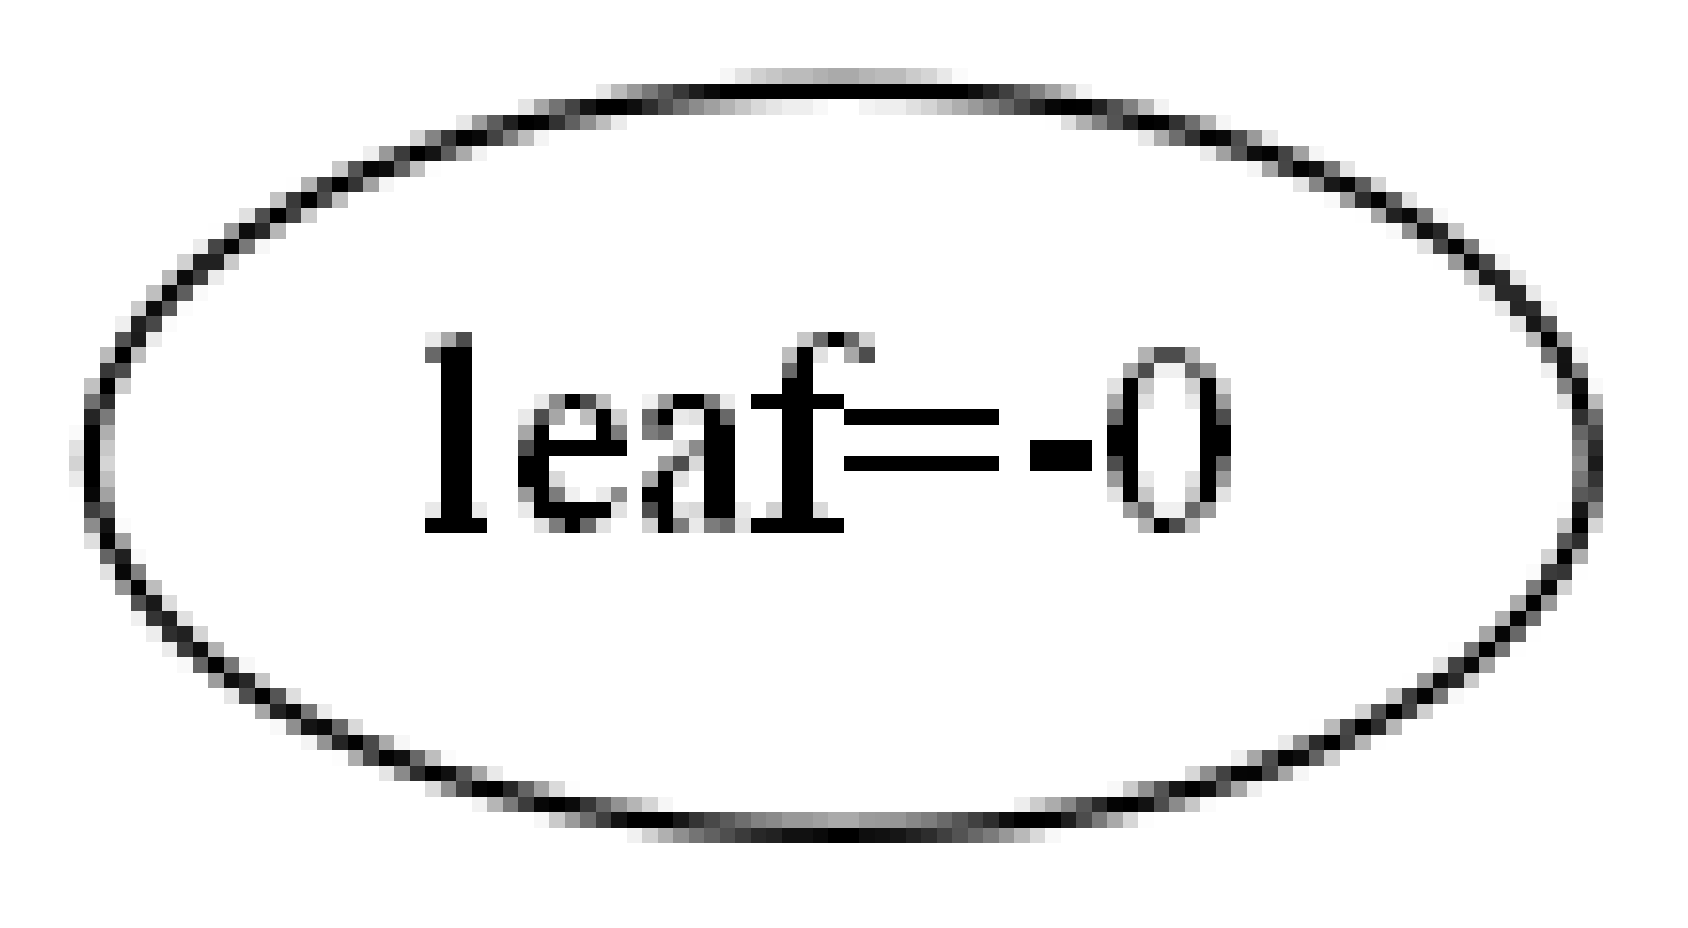

In [37]:
# #Print desicion tree -> transparency into exactly what the model is doing
ig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(XGB_SLEEP_MODEL, num_trees=10, ax=ax)
plt.show()